# LSTM Training with Enhanced Visualizations
This notebook trains an LSTM model for stock price prediction and provides advanced visualizations.

Introduction

This notebook trains and saves a machine learning model using an LSTM architecture for predicting stock prices. The focus is on individual tickers.

Key Steps:

1.	Load processed data from SQLite.

2.	Filter data for a specific ticker (default: XOM).

3.	Preprocess and normalize features.

4.	Build and train an LSTM model.

5.	Save the trained LSTM model and scaler for use in evaluation and predictions.

Import Libraries

•	pandas and sqlite3: For data manipulation and interaction with SQLite.

•	keras and tensorflow: For building and training the LSTM model.

•	scikit-learn: For preprocessing and model evaluation.

•	joblib: For saving trained models and scalers.

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib
import sqlite3
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sqlite3
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Random Forest Model Training Notebook

# Import necessary libraries
import pandas as pd
import sqlite3
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sqlite3
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Load and Prepare Data

In [2]:

# Load processed stock data
db_path = 'database/stocks_data.db'

# Load data from SQLite
with sqlite3.connect(db_path) as conn:
    query = "SELECT * FROM processed_stocks"
    data = pd.read_sql(query, conn)
print(f"Loaded processed data: {data.shape[0]} rows")

# Filter data for the default ticker
default_ticker = 'XOM'
ticker_data = data[data['Ticker'] == default_ticker]
print(f"Loaded data for {default_ticker}: {ticker_data.shape[0]} rows")


Loaded processed data: 71534 rows
Loaded data for XOM: 12533 rows


In [3]:

# Preprocess data for LSTM model
features = ['7-day MA', '14-day MA', 'Volatility', 'Lag_1', 'Lag_2']
target = 'Adj Close'

X = ticker_data[features]
y = ticker_data[target]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for LSTM (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train LSTM Model

In [4]:

# Define LSTM model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))  # Regularization
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, callbacks=[early_stopping])


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2954.1172 - val_loss: 2774.1230
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2307.2549 - val_loss: 375.0625
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206.7961 - val_loss: 31.9832
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78.7747 - val_loss: 21.1257
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75.4572 - val_loss: 14.2733
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68.8935 - val_loss: 10.5537
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65.9620 - val_loss: 8.1943
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.7954 - val_loss: 6.8170
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.6417 - val_loss: 6.4094
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58.8727 - val_loss: 6.1345
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.4741 - val_loss: 6.0152
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5

## Visualization: Cumulative Predictions

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


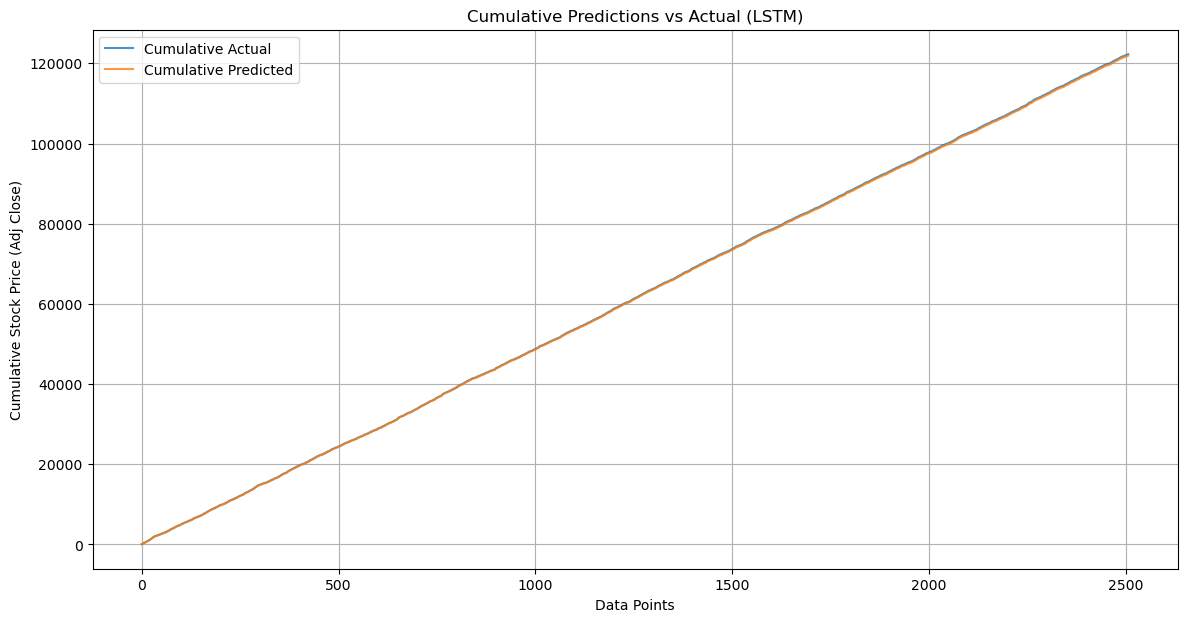

In [5]:

# Generate predictions
y_pred = model.predict(X_test)

# Cumulative plot of predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(np.cumsum(y_test.values), label='Cumulative Actual', alpha=0.8)
plt.plot(np.cumsum(y_pred.flatten()), label='Cumulative Predicted', alpha=0.8)
plt.title('Cumulative Predictions vs Actual (LSTM)')
plt.xlabel('Data Points')
plt.ylabel('Cumulative Stock Price (Adj Close)')
plt.legend()
plt.grid()
plt.show()


## Visualization: Prediction Horizon Accuracy

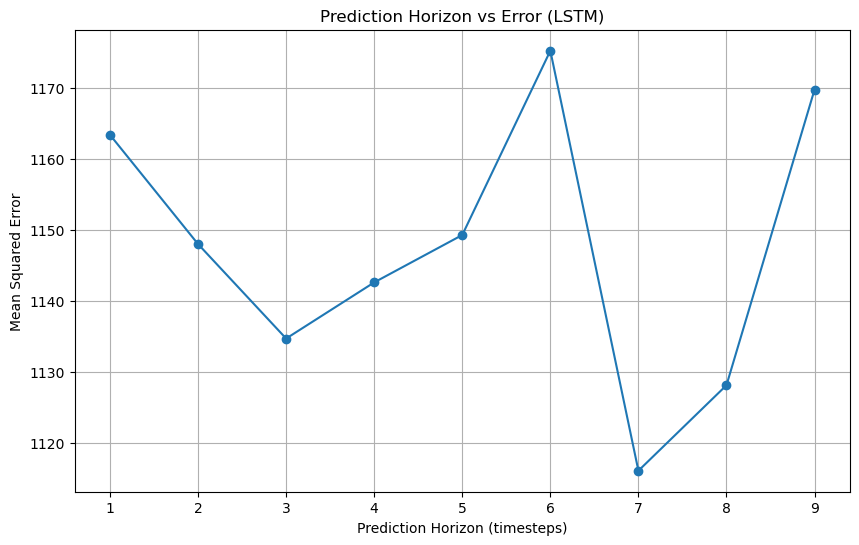

In [6]:

# Evaluate prediction accuracy over different horizons
horizon_errors = [mean_squared_error(y_test[i:], y_pred.flatten()[:-i]) for i in range(1, 10)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), horizon_errors, marker='o')
plt.title('Prediction Horizon vs Error (LSTM)')
plt.xlabel('Prediction Horizon (timesteps)')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()


## Visualization: Heatmap of Prediction Errors

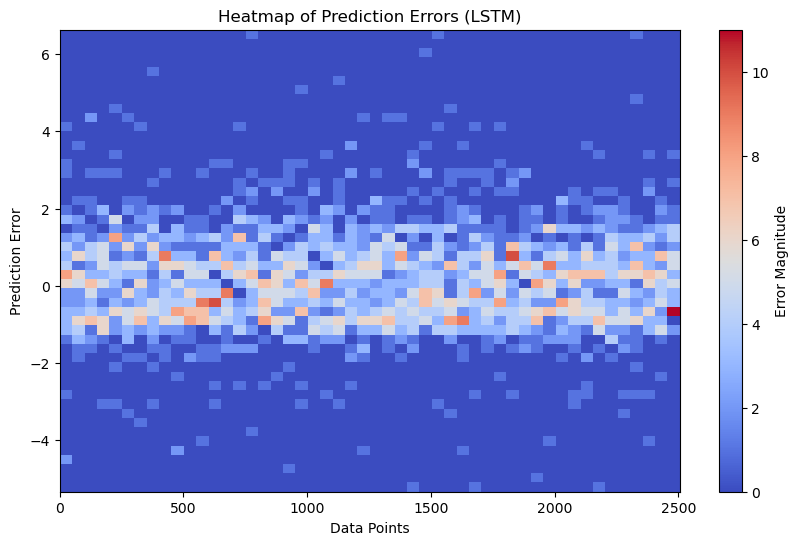

In [7]:

# Generate heatmap of prediction errors
errors = y_test.values - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist2d(range(len(errors)), errors, bins=(50, 50), cmap='coolwarm')
plt.colorbar(label='Error Magnitude')
plt.title('Heatmap of Prediction Errors (LSTM)')
plt.xlabel('Data Points')
plt.ylabel('Prediction Error')
plt.show()
